In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold, cross_val_score, train_test_split
plt.style.use('default')
plt.rcParams['axes.prop_cycle'] = plt.rcParamsDefault['axes.prop_cycle']
# import warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
dff = pd.read_csv('customer_data.csv',encoding='cp1252')

In [3]:
dff.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
dff.shape

(541909, 8)

In [5]:
dff.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
dff.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom


In [7]:
dff.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [9]:
dff.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
df=dff.dropna()

In [11]:
df.shape

(406829, 8)

In [12]:
num_col = df.select_dtypes(include='number').columns
cat_col = df.select_dtypes(include='object').columns

In [13]:
cat_col

Index(['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country'], dtype='object')

# Univariate Analysis

<Axes: xlabel='UnitPrice'>

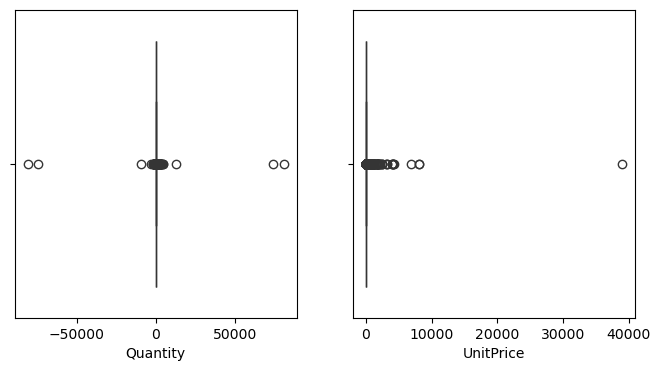

In [14]:
fig , axes = plt.subplots(1,2,figsize=(8,4))
sns.boxplot(x=df['Quantity'],palette='viridis',ax=axes[0])
sns.boxplot(x=df['UnitPrice'],palette='viridis',ax=axes[1])

There are extreme values on Price and negative values on Quantity, we have to handle it later

<Axes: xlabel='UnitPrice'>

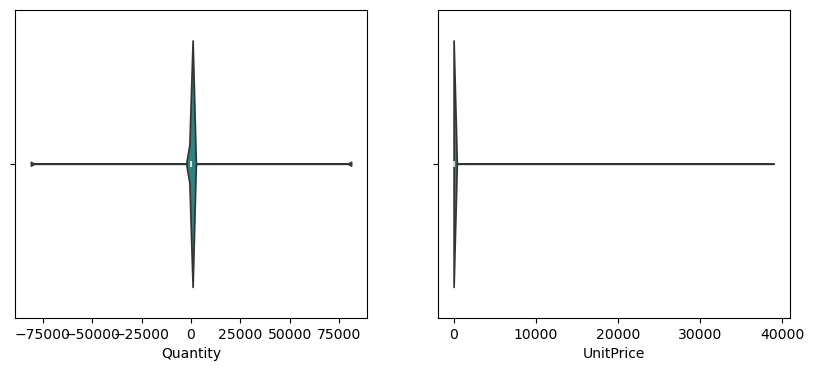

In [15]:
fig , axes = plt.subplots(1,2,figsize=(10,4))
sns.violinplot(x=df['Quantity'],palette='viridis',ax=axes[0])
sns.violinplot(x=df['UnitPrice'],palette='viridis',ax=axes[1])

# Data Pre Processing

### Drop Missing Values

We can't impute values on Description Features

In [16]:
missing_value = df.isnull().mean()*100
# Print the percentage of missing values
print(missing_value)

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64


In [17]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [18]:
df.shape

(406829, 8)

<Axes: xlabel='Quantity', ylabel='Density'>

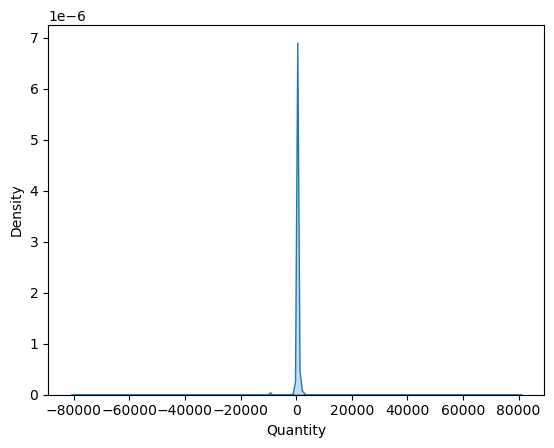

In [19]:
sns.kdeplot(df['Quantity'],shade=True)

In [20]:
# # filter positive "Qunatity" feature
new_df = df[(df['Quantity'] > 0) & (df['Quantity'] < 1000)]
print(f'Dataset consist of {new_df.shape[0]} Rows and {new_df.shape[1]} Columns')


Dataset consist of 397808 Rows and 8 Columns


<Axes: xlabel='Quantity', ylabel='Density'>

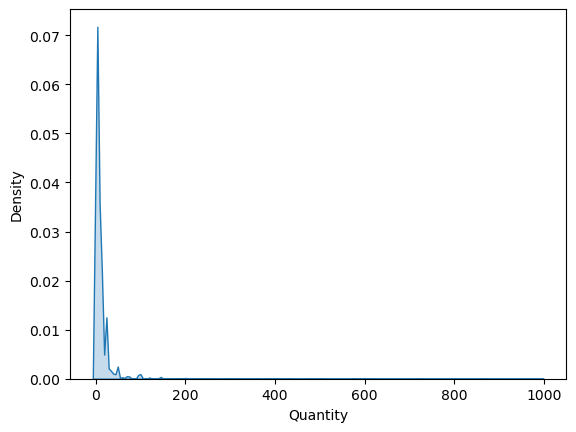

In [21]:
sns.kdeplot(new_df['Quantity'],shade=True)

In [22]:
new_df['Quantity'].describe()

count    397808.000000
mean         12.149336
std          31.405223
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max         992.000000
Name: Quantity, dtype: float64

In [23]:
new_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [24]:
new_df['UnitPrice'].describe()

count    397808.000000
mean          3.116816
std          22.099973
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

# Feature Engineering

In [25]:
new_df['InvoiceDate'] = pd.to_datetime(new_df['InvoiceDate'])


In [26]:
new_dff =new_df.copy()

In [27]:
# Create new features
new_dff['Dayofmonth'] = new_dff['InvoiceDate'].dt.day
new_dff['Day_name'] = new_dff['InvoiceDate'].dt.day_name()
new_dff['Month'] = new_dff['InvoiceDate'].dt.month
new_dff['Year'] = new_dff['InvoiceDate'].dt.year
new_dff['Hour'] = new_dff['InvoiceDate'].dt.hour


In [28]:
# creating sales feature
new_dff['Sales'] = new_dff['UnitPrice']*new_dff['Quantity']

In [29]:
new_dff.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Dayofmonth,Day_name,Month,Year,Hour,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,Wednesday,12,2010,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,Wednesday,12,2010,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,Wednesday,12,2010,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,Wednesday,12,2010,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,Wednesday,12,2010,8,20.34


In [30]:
new_dff.describe()

,Quantity,UnitPrice,CustomerID,Dayofmonth,Month,Year,Hour,Sales
count,397808.000000,397808.000000,397808.000000,397808.000000,397808.000000,397808.00000,397808.000000,397808.000000
mean,12.149336,3.116816,15294.218467,15.042649,7.612683,2010.93427,12.728364,21.372397
std,31.405223,22.099973,1713.144862,8.653622,3.416390,0.24781,2.273472,89.664725
min,1.000000,0.000000,12347.000000,1.000000,1.000000,2010.00000,6.000000,0.000000
25%,2.000000,1.250000,13969.000000,7.000000,5.000000,2011.00000,11.000000,4.680000
50%,6.000000,1.950000,15159.000000,15.000000,8.000000,2011.00000,13.000000,11.800000
75%,12.000000,3.750000,16795.000000,22.000000,11.000000,2011.00000,14.000000,19.800000
max,992.000000,8142.750000,18287.000000,31.000000,12.000000,2011.00000,20.000000,38970.000000


# Expolatory Data Analysis

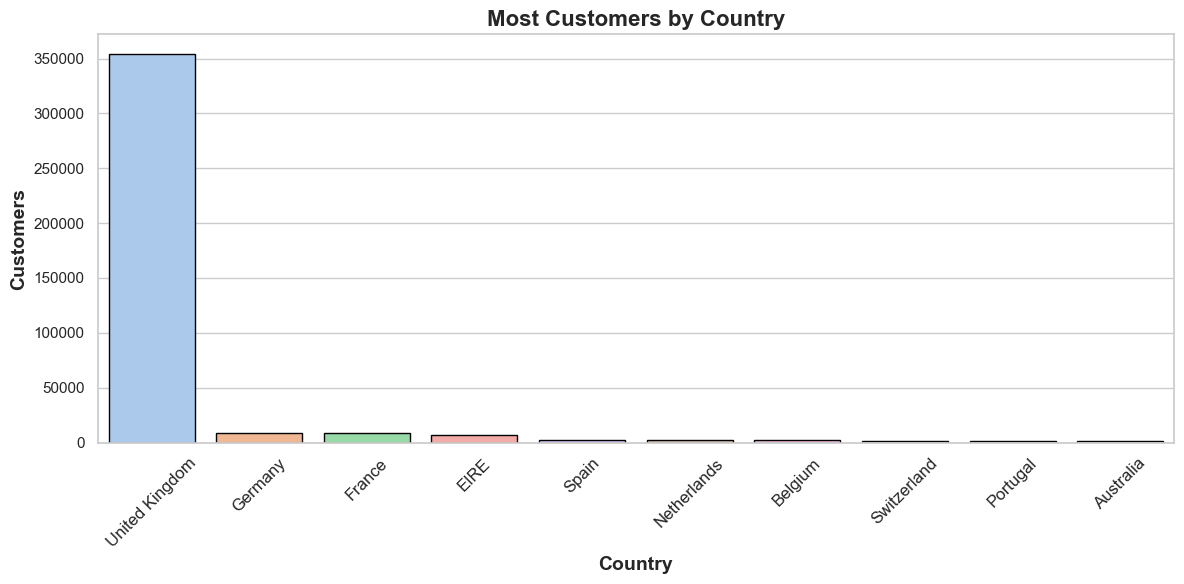

In [31]:
sns.set(style="whitegrid")
custom_palette = sns.color_palette("pastel")
plt.figure(figsize=(12, 6))
sns.countplot(
    x='Country',
    data=new_dff,
    palette=custom_palette,
    order=new_dff['Country'].value_counts().iloc[:10].index,
    edgecolor='black'  
)

# Add titles and labels
plt.title('Most Customers by Country', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=14, fontweight='bold')
plt.ylabel('Customers', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12,rotation=45)

plt.tight_layout()
plt.show()

# Top 10 Countries according to sales

In [32]:
exp = new_dff.groupby('Country')['Sales'].sum().sort_values(ascending=False).head(10)

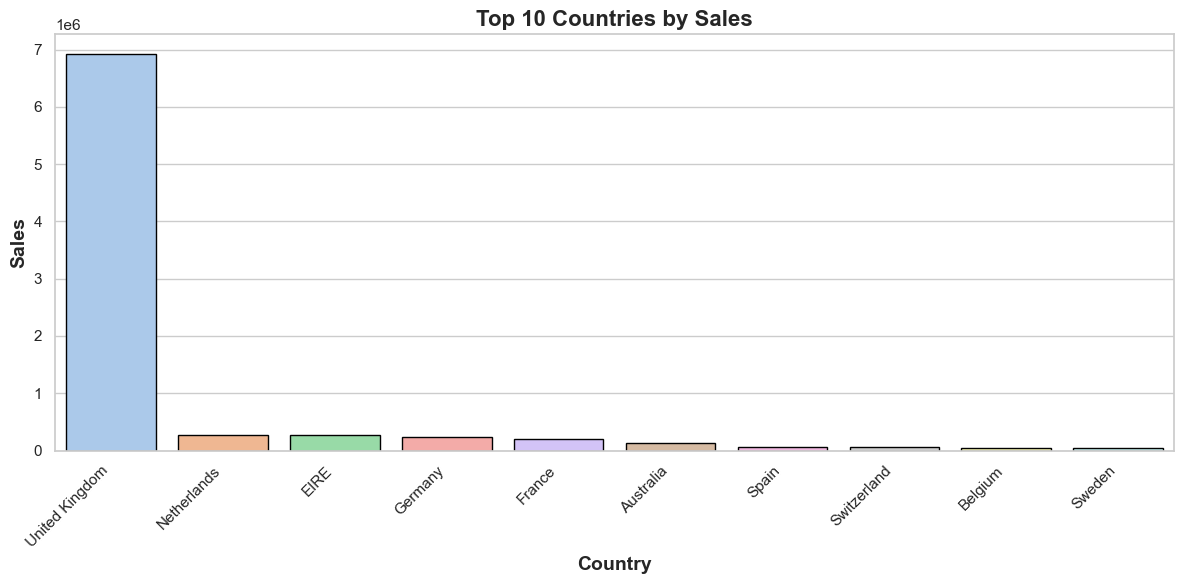

In [33]:
custom_palette = sns.color_palette("pastel")
plt.figure(figsize=(12, 6))
sns.barplot(x=exp.index, y=exp.values, palette=custom_palette, edgecolor='black')
plt.title('Top 10 Countries by Sales',fontsize=16, fontweight='bold')
plt.xlabel('Country',fontsize=14, fontweight='bold')
plt.ylabel('Sales',fontsize=14, fontweight='bold')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()

plt.show()

##  Top 10 Best Seller Product

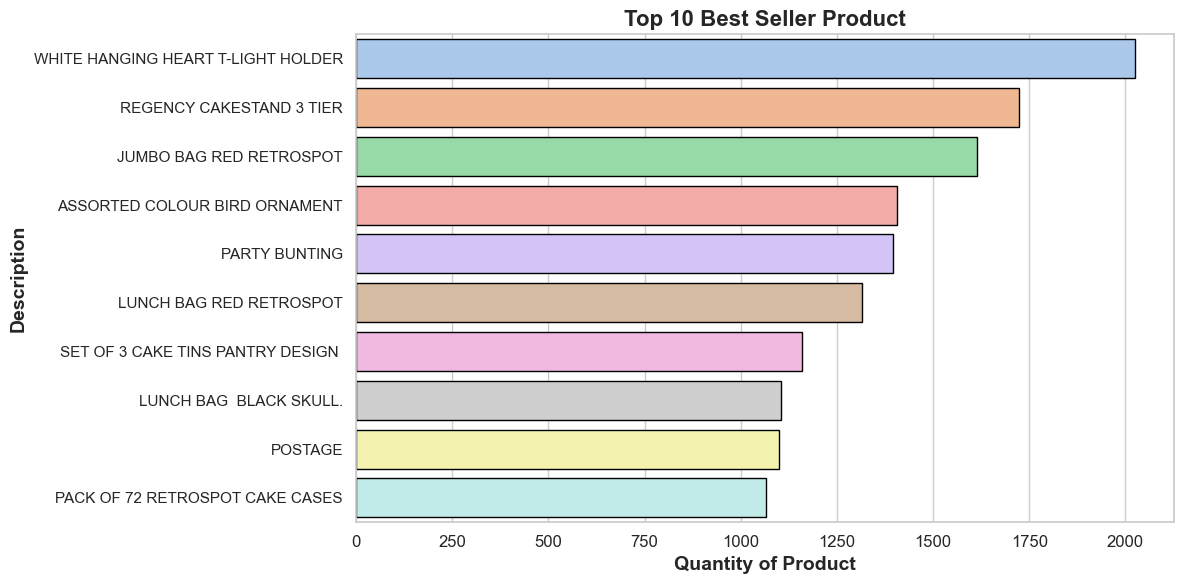

In [34]:
sns.set(style="whitegrid")
custom_palette = sns.color_palette("pastel")
plt.figure(figsize=(12, 6))
sns.countplot(
    y= new_dff['Description'], data=new_dff, palette=custom_palette, order=new_dff['Description'].value_counts().iloc[:10].index, edgecolor='black'  
)

# Add titles and labels
plt.title('Top 10 Best Seller Product', fontsize=16, fontweight='bold')
plt.xlabel('Quantity of Product', fontsize=14, fontweight='bold')
plt.ylabel('Description', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12,rotation=0)

plt.tight_layout()
plt.show()

## Top 10 Highest Sales Products

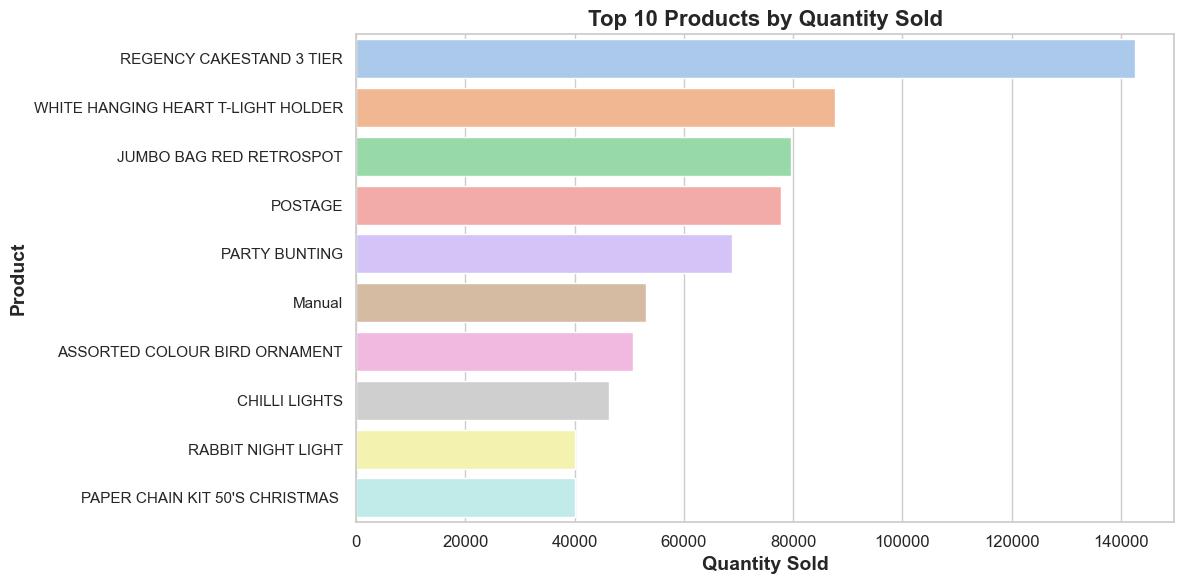

In [35]:
sns.set(style="whitegrid")
custom_palette = sns.color_palette("pastel")
plt.figure(figsize=(12, 6))
sns.barplot(y='Description', x='Sales', palette=custom_palette, 
            data=new_dff.groupby('Description').agg(Sales=('Sales','sum')).reset_index().nlargest(10, 'Sales'))

plt.title('Top 10 Products by Quantity Sold', fontsize=16, fontweight='bold')
plt.xlabel('Quantity Sold', fontsize=14, fontweight='bold')
plt.ylabel('Product', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12,rotation=0)

plt.tight_layout()
plt.show()


## Top 10 Highest Sales Products

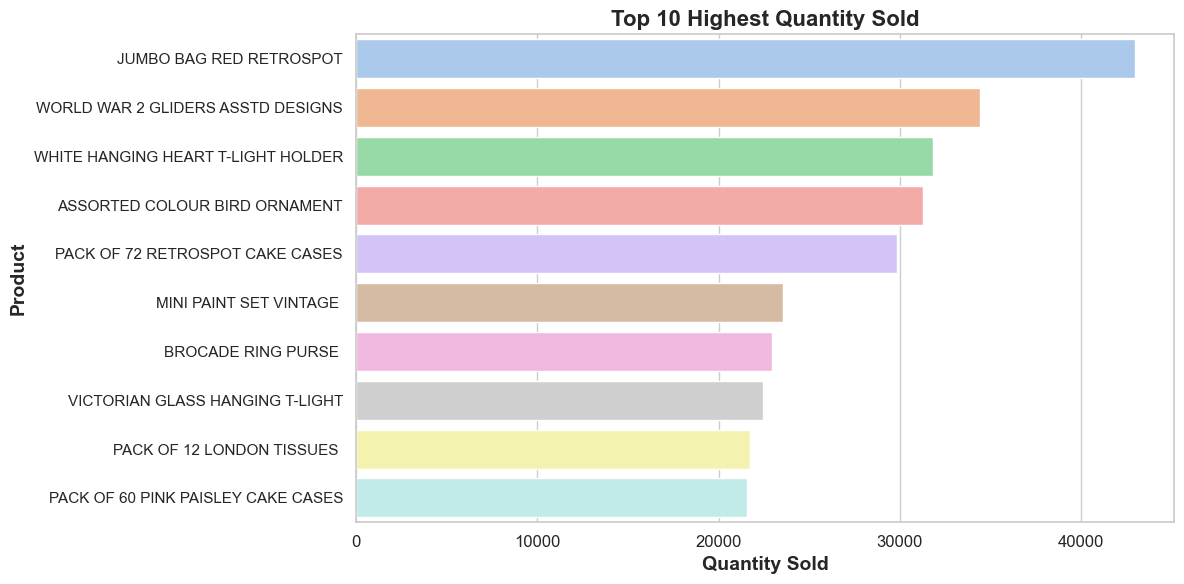

In [36]:
sns.set(style="whitegrid")
custom_palette = sns.color_palette("pastel")
plt.figure(figsize=(12, 6))
sns.barplot(y='Description', x='Quantity', palette=custom_palette, 
            data=new_dff.groupby('Description').agg(Quantity=('Quantity','sum')).reset_index().nlargest(10, 'Quantity'))

plt.title('Top 10 Highest Quantity Sold', fontsize=16, fontweight='bold')
plt.xlabel('Quantity Sold', fontsize=14, fontweight='bold')
plt.ylabel('Product', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12,rotation=0)

plt.tight_layout()
plt.show()


## Num of Transactions per month

<Axes: xlabel='Month', ylabel='count'>

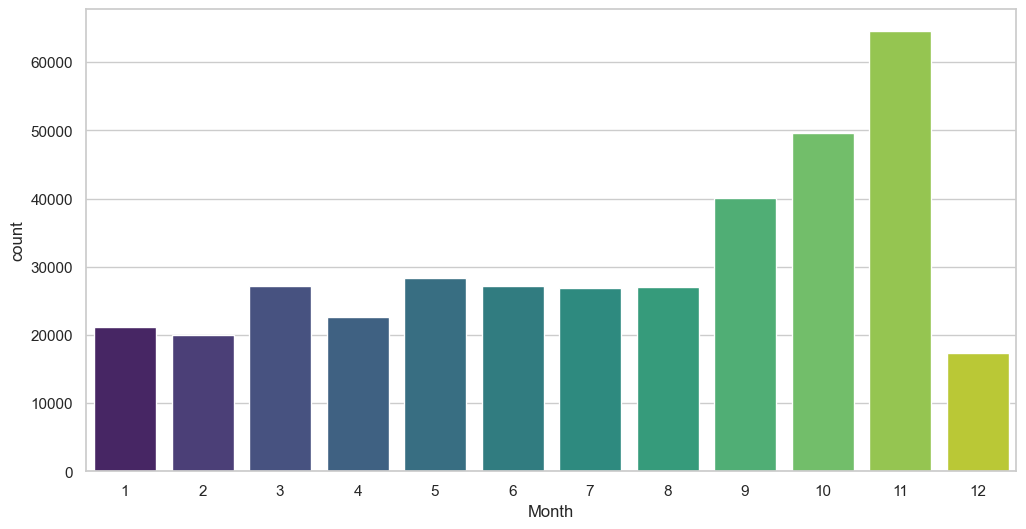

In [37]:
plt.figure(figsize=(12, 6))
df2 = new_dff[new_dff['Year']==2011]
sns.countplot(x='Month', data=df2, palette='viridis')

## Maximum Sales by month

<Axes: xlabel='Month', ylabel='Sales'>

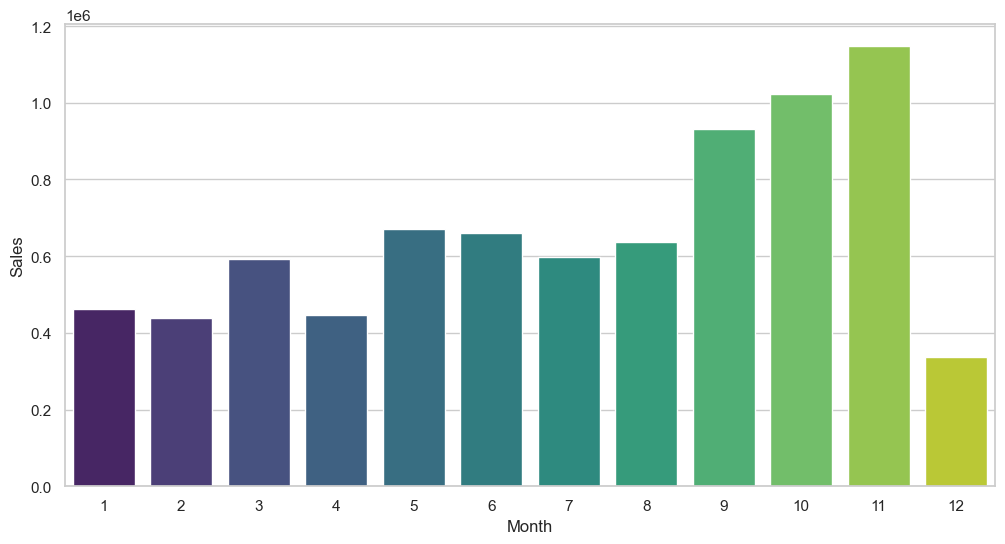

In [38]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Sales', 
            data=df2.groupby('Month').agg(Sales=('Sales','sum')).reset_index(), 
            palette='viridis')

## Num of Transaction by Date (2011)

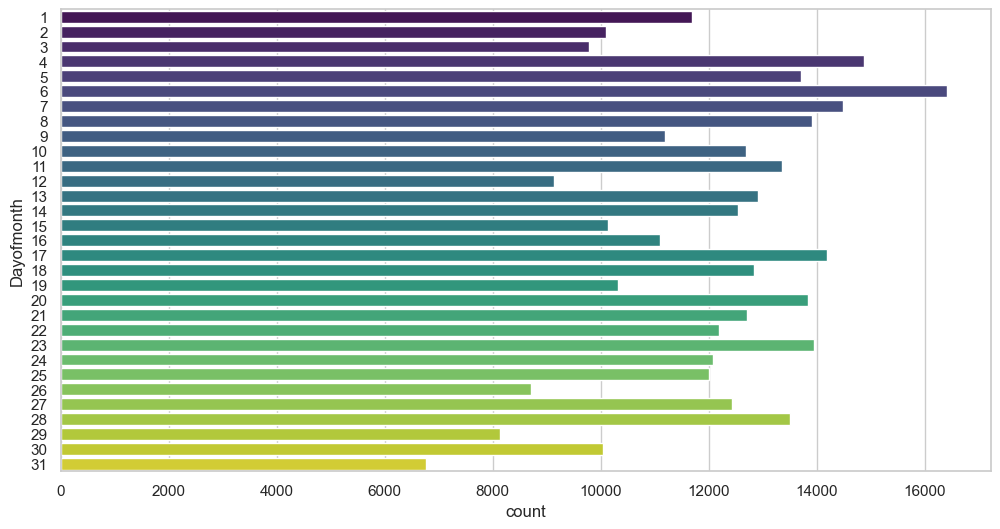

In [39]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Dayofmonth', data=df2, palette='viridis')
plt.show()

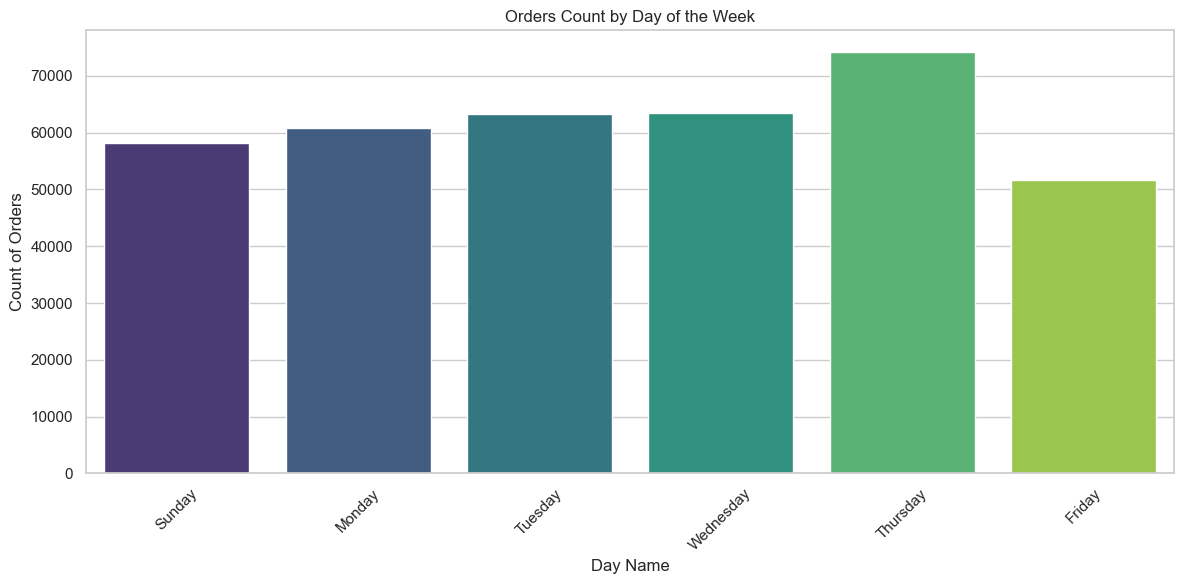

In [40]:
plt.figure(figsize=(12, 6))
orders = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
sns.countplot(x='Day_name', data=df2, palette='viridis',order=orders)
plt.xlabel('Day Name')
plt.ylabel('Count of Orders')
plt.title('Orders Count by Day of the Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Num of Transaction per Hour

<Axes: xlabel='Hour', ylabel='count'>

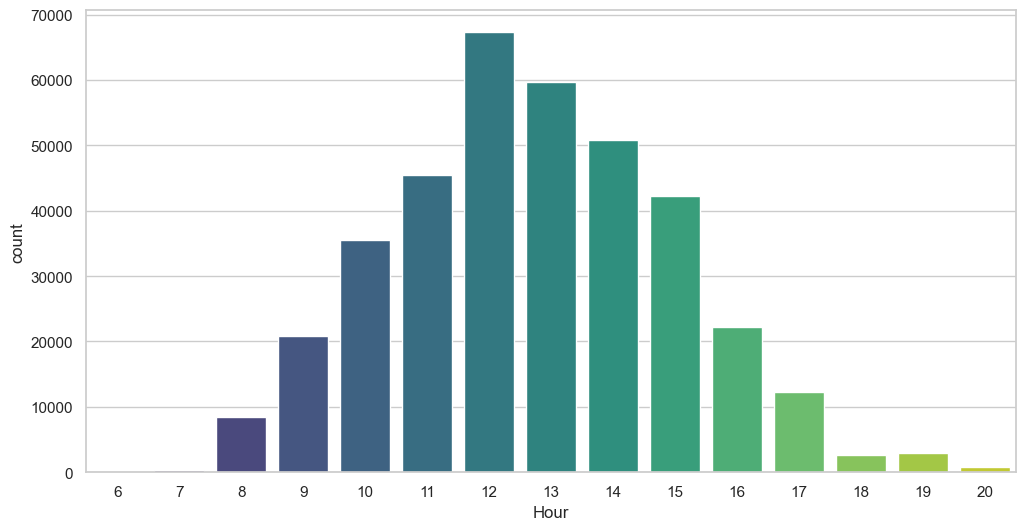

In [41]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', data=df2, palette='viridis')

# Find repeated Customers

In [42]:
# we're taking all of the transactions that occurred before December 01, 2011
# we're taking all of the transactions that occurred before December 01, 2012
new_dff2011 = new_dff.loc[new_dff['InvoiceDate'] < '2011-12-01']
new_dff2011.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Dayofmonth,Day_name,Month,Year,Hour,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,Wednesday,12,2010,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,Wednesday,12,2010,8,20.34


In [43]:
#  Get total amount spent(Sales) per invoice and associate it with CustomerID and Country
invoice_groupby_df = new_dff2011.groupby(by=['InvoiceNo', 'InvoiceDate']).agg({'Sales': sum, 
                                                                        'CustomerID': max,
                                                                        'Country': max}).reset_index()

# Sort on Amount spent, this gives us the largest invoices
invoice_groupby_df = invoice_groupby_df.sort_values(by='Sales', ascending=False) 
invoice_groupby_df.head(10)

,InvoiceNo,InvoiceDate,Sales,CustomerID,Country
7931,556444,2011-06-10 15:28:00,38970.00,15098.0,United Kingdom
8117,556917,2011-06-15 13:37:00,22775.93,12415.0,Australia
14460,572209,2011-10-21 12:08:00,22206.00,18102.0,United Kingdom
12414,567381,2011-09-20 10:12:00,22104.80,17450.0,United Kingdom
10849,563614,2011-08-18 08:51:00,21880.44,12415.0,Australia
14373,572035,2011-10-20 12:03:00,20277.92,14646.0,Netherlands
10617,563076,2011-08-11 16:12:00,19150.66,14646.0,Netherlands
1819,541220,2011-01-14 14:11:00,16774.72,14156.0,EIRE
3494,545475,2011-03-03 10:59:00,16726.84,12415.0,Australia
7881,556255,2011-06-09 17:27:00,16488.00,18102.0,United Kingdom


In [44]:
monthly_repeat_customers = invoice_groupby_df.set_index('InvoiceDate').groupby([
  pd.Grouper(freq='M'), 'CustomerID']).filter(lambda x: len(x) > 1).resample('M').nunique()['CustomerID'].reset_index()
monthly_repeat_customers

,InvoiceDate,CustomerID
0,2010-12-31,263
1,2011-01-31,152
2,2011-02-28,153
3,2011-03-31,203
4,2011-04-30,170
5,2011-05-31,281
6,2011-06-30,220
7,2011-07-31,227
8,2011-08-31,198
9,2011-09-30,272


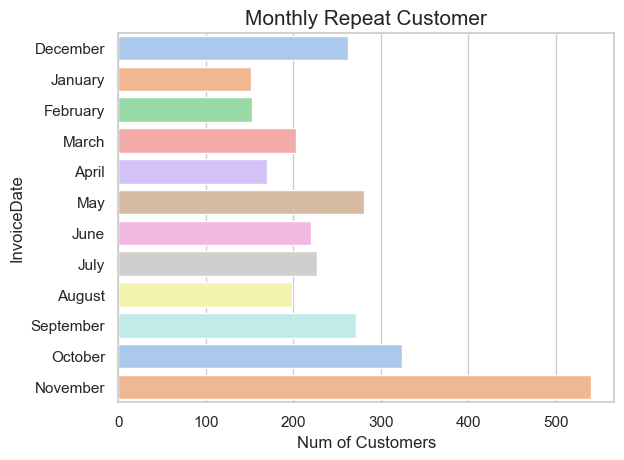

In [45]:
month_order = ['2010-12-31', '2011-01-31', '2011-02-28', '2011-03-31', '2011-04-30', '2011-05-31',
               '2011-06-30','2011-07-31', '2011-08-31', '2011-09-30', '2011-10-31', '2011-11-30']
ytics = ['December','January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']


sns.set(style="whitegrid")
custom_palette = sns.color_palette("pastel")
a = sns.barplot(y='InvoiceDate', x='CustomerID', data=monthly_repeat_customers, palette=custom_palette)
a.set_yticklabels(ytics)
plt.title('Monthly Repeat Customer', fontsize=15)
plt.xlabel('Num of Customers')
plt.show()


## Monthly Unique Customers

In [46]:
# now lets compare monthly_repeat_customers againts the total number of monthly customers 
monthly_unique_customers = invoice_groupby_df.set_index('InvoiceDate')['CustomerID'].resample('M').nunique().reset_index()
monthly_unique_customers 

,InvoiceDate,CustomerID
0,2010-12-31,880
1,2011-01-31,740
2,2011-02-28,756
3,2011-03-31,973
4,2011-04-30,856
5,2011-05-31,1053
6,2011-06-30,991
7,2011-07-31,947
8,2011-08-31,934
9,2011-09-30,1264


Text(0.5, 0, 'Num of Customers')

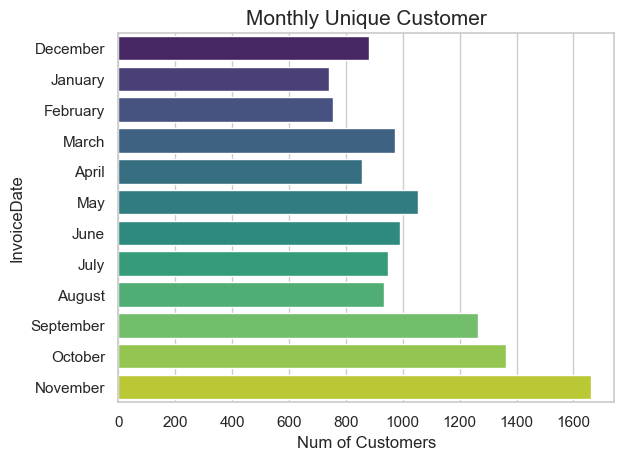

In [47]:
ytics = ['December','January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']

b = sns.barplot(y='InvoiceDate', x='CustomerID', data=monthly_unique_customers, palette='viridis')
b.set_yticklabels(ytics)
plt.title('Monthly Unique Customer', fontsize=15)
plt.xlabel('Num of Customers')

In [48]:
# repeat customer
monthly_repeat_customer = invoice_groupby_df.set_index('InvoiceDate').groupby([
  pd.Grouper(freq='M'), 'CustomerID']).filter(lambda x: len(x) > 1).resample('M').nunique()['CustomerID']

# unique customer
monthly_unique_customer = new_dff2011.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()

monthly_repeat_percentages = (monthly_repeat_customer/monthly_unique_customer*100)

# Ratio of Repeat to Unique customers
monthly_repeat_percentage = (monthly_repeat_customer/monthly_unique_customer*100).reset_index()
monthly_repeat_percentage 

,InvoiceDate,CustomerID
0,2010-12-31,29.886364
1,2011-01-31,20.540541
2,2011-02-28,20.238095
3,2011-03-31,20.863309
4,2011-04-30,19.859813
5,2011-05-31,26.685660
6,2011-06-30,22.199798
7,2011-07-31,23.970433
8,2011-08-31,21.199143
9,2011-09-30,21.518987


Text(0.5, 0, 'Percentage Repeat Customers (%)')

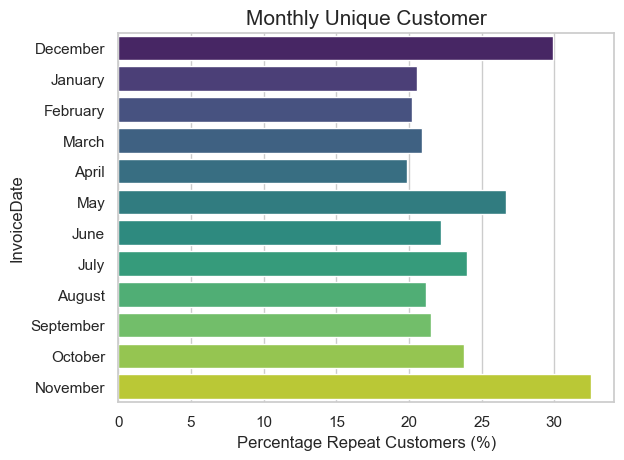

In [49]:

ytics = ['December','January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']
xtics = ['0%', '5%', '10%', '15%', '20%', '25%', '30%']
c = sns.barplot(y='InvoiceDate', x='CustomerID', data=monthly_repeat_percentage, palette='viridis')
c.set_yticklabels(ytics)
plt.title('Monthly Unique Customer', fontsize=15)
plt.xlabel('Percentage Repeat Customers (%)')

## Number of Unique Customers vs. Repeat Customers Over Time

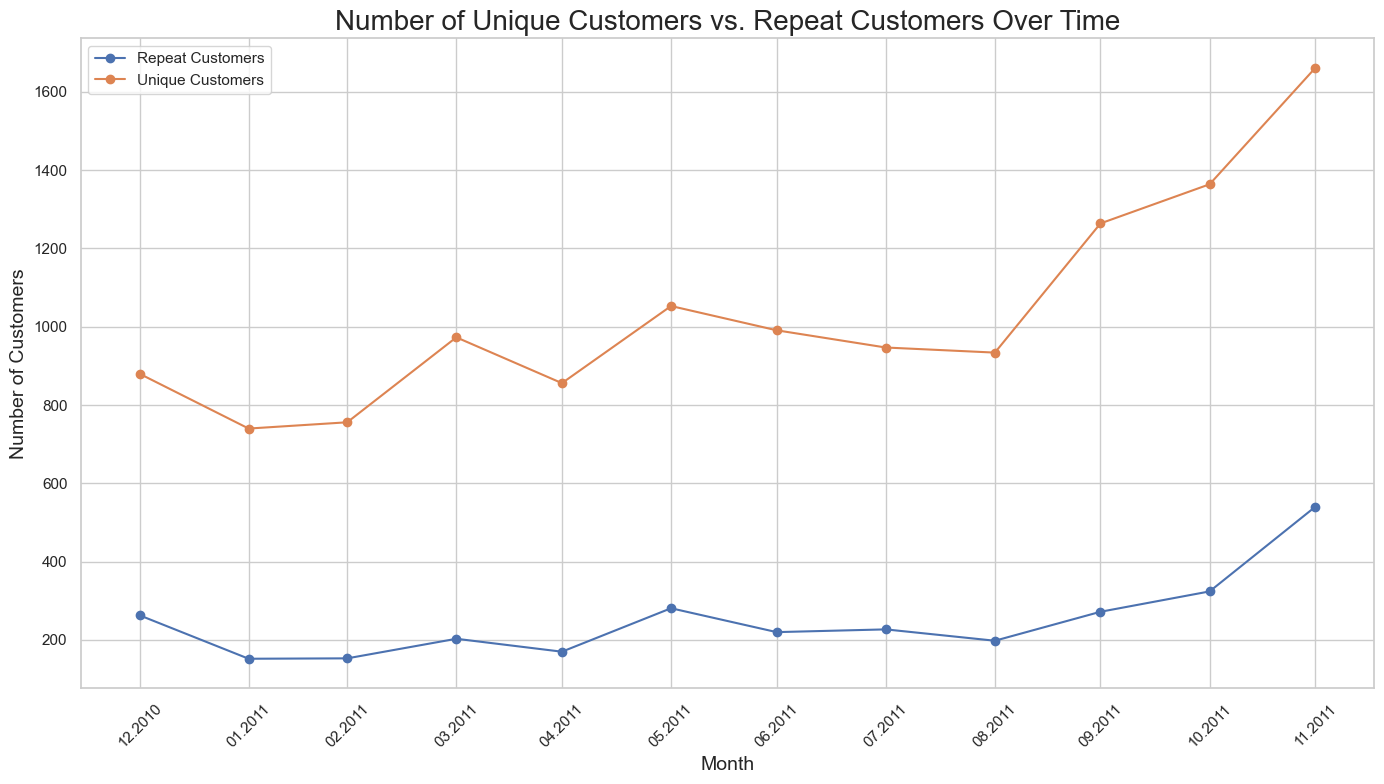

In [50]:
import matplotlib.pyplot as plt

# Assuming monthly_repeat_customers and monthly_unique_customers are DataFrames with 'InvoiceDate' as datetime index

fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(monthly_repeat_customers['InvoiceDate'], monthly_repeat_customers['CustomerID'], label='Repeat Customers', marker='o')
ax.plot(monthly_unique_customers['InvoiceDate'], monthly_unique_customers['CustomerID'], label='Unique Customers', marker='o')
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Number of Customers', fontsize=14)
ax.set_title('Number of Unique Customers vs. Repeat Customers Over Time', fontsize=20)
ax.legend()

# Format x-axis with datetime labels
ax.set_xticks(monthly_repeat_customers['InvoiceDate'])
ax.set_xticklabels([date.strftime('%m.%Y') for date in monthly_repeat_customers['InvoiceDate']], rotation=45)

plt.tight_layout()
plt.show()


## Number of Repeat Customers Ratio to Unique Customers Over Time

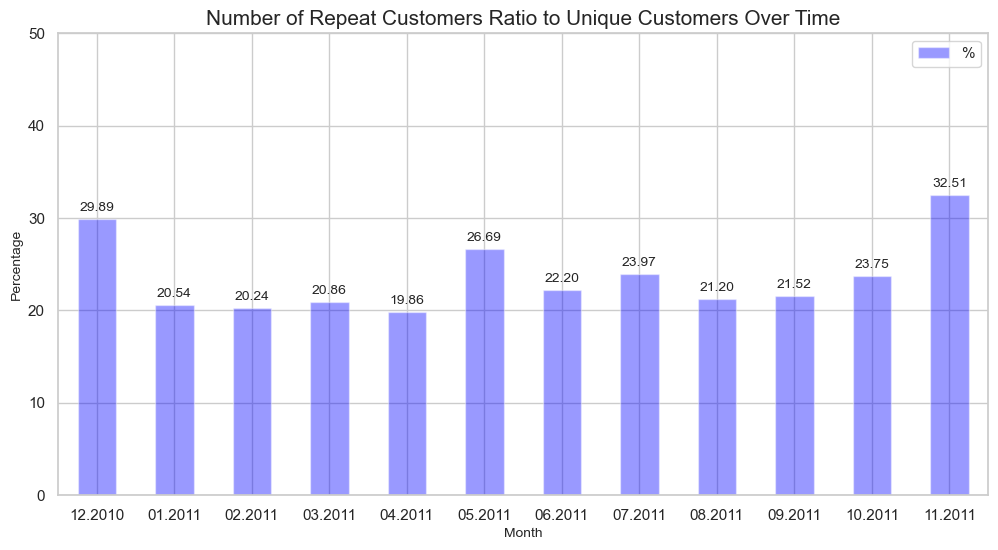

In [51]:
ax = pd.DataFrame(monthly_repeat_percentages.values).plot.bar(figsize=(12,6), color='Blue', alpha=0.4)

# Iterrating over the bars one-by-one
for bar in ax.patches:
    
    ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')


ax.set_ylim([0, 50])
ax.set_xlabel('Month', fontsize=10)
ax.set_ylabel('Percentage', fontsize=10)
ax.set_title('Number of Repeat Customers Ratio to Unique Customers Over Time', fontsize=15)
plt.legend('%')
plt.xticks(range(len(monthly_repeat_customer.index)), [x.strftime('%m.%Y') for x in monthly_repeat_customer.index], rotation=0)
plt.show()

## Monthly Revenue vs Monthlu Revenue Repeat Customer

In [52]:
# Total revenue per customer 
monthly_revenue = new_dff2011.set_index('InvoiceDate')['Sales'].resample('M').sum()

# monthly revenue repeat customer
monthly_rev_repeat_cust = invoice_groupby_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID']).filter(lambda x: len(x) > 1).resample('M').sum()['Sales']

# Let's get a percentage of the revenue from repeat customers to the overall monthly revenue
monthly_rev_perc_repeat_cust = monthly_rev_repeat_cust/monthly_revenue * 100.0

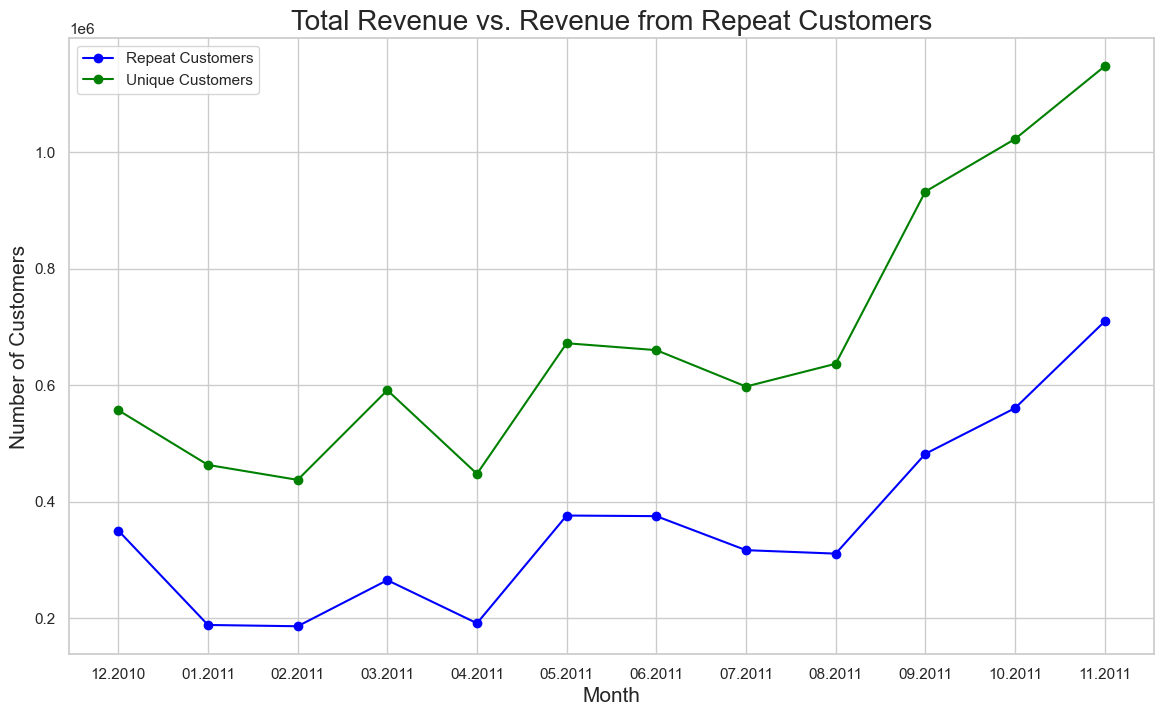

In [53]:
ax= pd.DataFrame(monthly_rev_repeat_cust.values).plot(figsize=(14,8), color='Blue',marker='o')

pd.DataFrame(monthly_revenue.values).plot(ax=ax,grid=True, color='Green',marker='o')


ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Number of Customers', fontsize=15)
ax.set_title('Total Revenue vs. Revenue from Repeat Customers', fontsize=20)
plt.legend(['Repeat Customers', 'Unique Customers'])

plt.xticks(range(len(monthly_rev_repeat_cust.index)), [x.strftime('%m.%Y') for x in monthly_rev_repeat_cust.index], rotation=0)


    
plt.show()

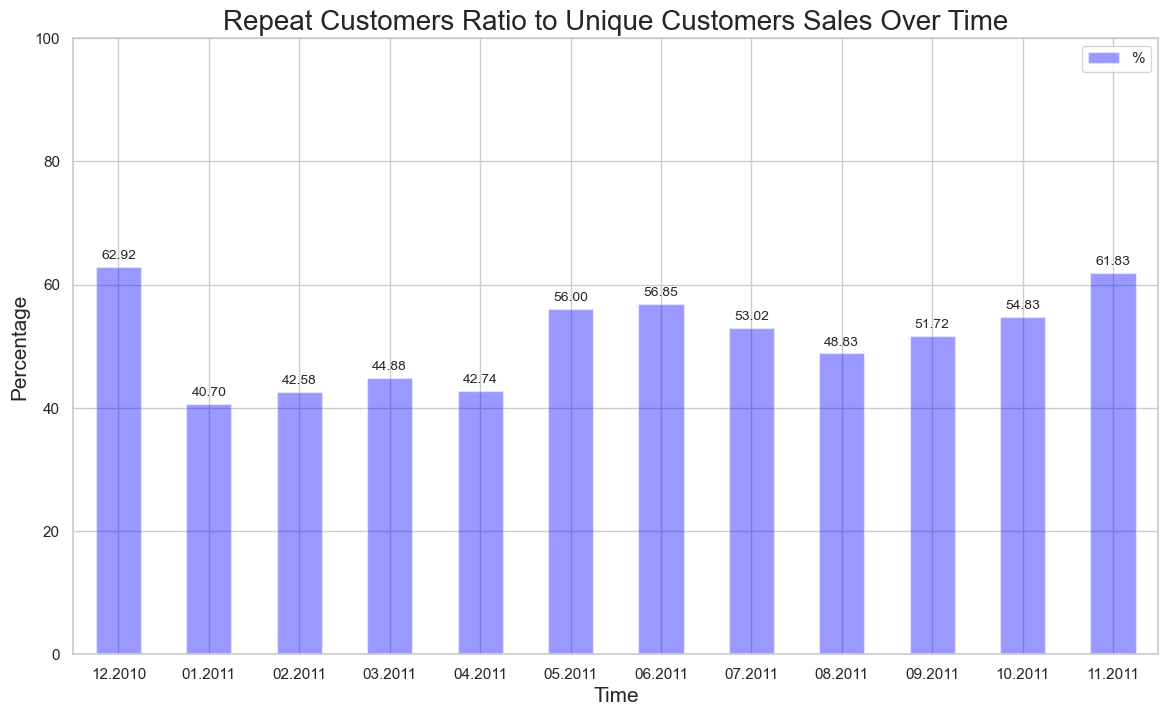

In [54]:
ax = pd.DataFrame(monthly_rev_perc_repeat_cust.values).plot.bar(figsize=(14,8), color='Blue', alpha=0.4)

# Iterrating over the bars one-by-one
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')


ax.set_ylim([0, 100])
ax.set_xlabel('Time', fontsize=15)
ax.set_ylabel('Percentage', fontsize=15)
ax.set_title('Repeat Customers Ratio to Unique Customers Sales Over Time', fontsize=20)
plt.legend('%')
plt.xticks(range(len(monthly_rev_repeat_cust.index)), [x.strftime('%m.%Y') for x in monthly_rev_repeat_cust.index], rotation=0)

plt.show()

# Customer Lifetime Value

In [55]:
clv_cols = ['CustomerID', 'InvoiceDate', 'Sales']
clv_data = new_dff2011[clv_cols]
clv_data.head()

,CustomerID,InvoiceDate,Sales
0,17850.0,2010-12-01 08:26:00,15.30
1,17850.0,2010-12-01 08:26:00,20.34
2,17850.0,2010-12-01 08:26:00,22.00
3,17850.0,2010-12-01 08:26:00,20.34
4,17850.0,2010-12-01 08:26:00,20.34


In [56]:
from lifetimes.plotting import *
from lifetimes.utils import *

#Built-in utility functions from lifetimes package to transform the transactional data (one row per purchase) 
#into summary data (a frequency, recency, age and monetary).

clv_data = summary_data_from_transaction_data(clv_data, 'CustomerID', 'InvoiceDate', monetary_value_col='Sales', observation_period_end='2011-12-9')
cllv = clv_data.reset_index()
cllv.head()

,CustomerID,frequency,recency,T,monetary_value
0,12347.0,5.0,328.0,367.0,674.678000
1,12348.0,3.0,283.0,358.0,301.480000
2,12349.0,0.0,0.0,18.0,0.000000
3,12350.0,0.0,0.0,310.0,0.000000
4,12352.0,6.0,260.0,296.0,368.256667


In [57]:
# we can find when 12347 customer first purchase (2011-12-09)-367 = 2010-12-07'
# Last purchase they do is 2011-12-09' - 328 days = '2010-12-17'
#gap between first purchase and last purchase is 17 days 

In [58]:
cllv['CustomerID'].value_counts()

12347.0    1
16302.0    1
16275.0    1
16276.0    1
16278.0    1
          ..
14329.0    1
14331.0    1
14332.0    1
14333.0    1
18287.0    1
Name: CustomerID, Length: 4291, dtype: int64

In [59]:
cllv.describe()

,CustomerID,frequency,recency,T,monetary_value
count,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000
mean,15302.653694,2.736425,125.328362,224.716616,259.125896
std,1720.437460,5.730239,129.083757,116.450033,446.621984
min,12347.000000,0.000000,0.000000,9.000000,0.000000
25%,13816.500000,0.000000,0.000000,116.000000,0.000000
50%,15300.000000,1.000000,84.000000,250.000000,170.890000
75%,16781.500000,3.000000,245.000000,327.000000,357.092727
max,18287.000000,126.000000,364.000000,373.000000,9663.103913


In [60]:
# df_new['CustomerID'] = df_new['CustomerID'].astype('int')  # or 'str' if that's appropriate for your case
unique_customers_before = cllv['CustomerID'].nunique()
unique_customers_before

4291

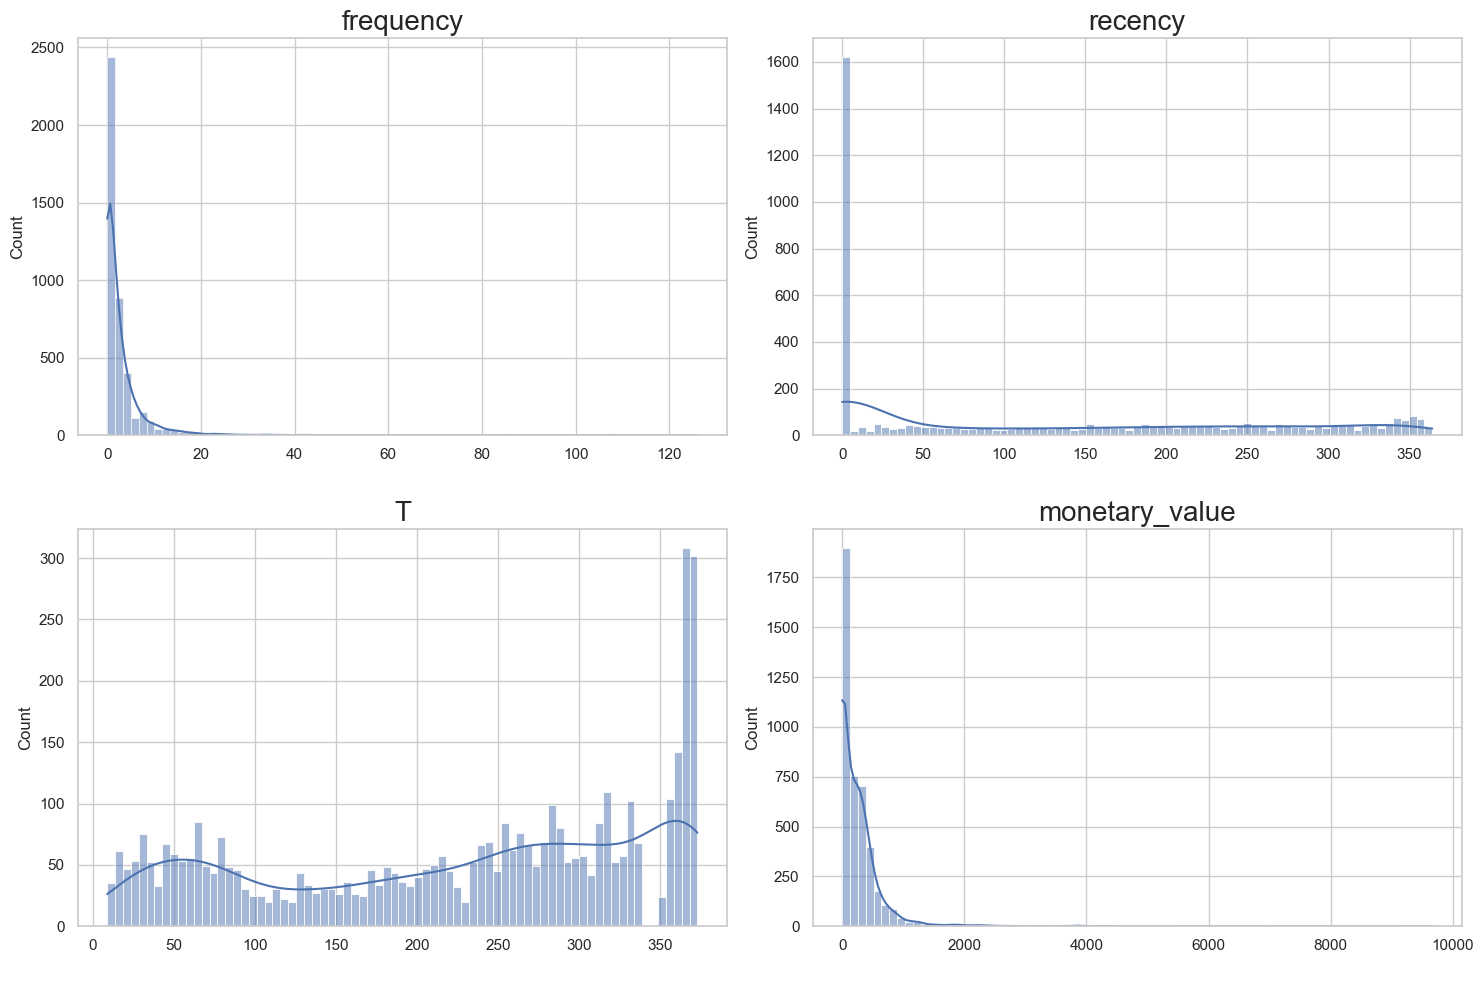

In [61]:
plt.figure(figsize=(15,10))
for col in range(0, len(clv_data.columns)):
    plt.subplot(2,2,col+1)
    sns.histplot(x=clv_data[clv_data.columns[col]], bins=75, kde=True, palette='Blues_d')
    plt.xlabel(' ')
    plt.title(clv_data.columns[col], fontsize=20)
    plt.tight_layout()

In [62]:
# cusomer who buy only once
one_time_buyer = print('one_time_buyer:', round(sum(clv_data['frequency'] == 0)/(len(clv_data['frequency'])),3)*100, '%')

one_time_buyer: 37.3 %


In [103]:
pip install lifetimes


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [63]:
from lifetimes import BetaGeoFitter
from lifetimes import BetaGeoFitter
betageo = BetaGeoFitter(penalizer_coef=0.0)
betageo.fit(clv_data['frequency'], clv_data['recency'], clv_data['T'])
print(betageo)
betageo.summary


<lifetimes.BetaGeoFitter: fitted with 4291 subjects, a: 0.01, alpha: 73.66, b: 6.28, r: 0.82>


,coef,se(coef),lower 95% bound,upper 95% bound
r,0.823631,0.027336,0.770053,0.877210
alpha,73.658225,2.832244,68.107027,79.209422
a,0.006706,0.014278,-0.021279,0.034691
b,6.280137,16.453393,-25.968513,38.528787


### Overview

- **r = 0.82**: About 82% of people who visited the store once will come back again.
- **alpha = 73.66**: People visit the store quite often. It's a popular place!
- **beta = 79.21**: People usually visit the store pretty recently.
- **a = 0.0067 and b = 6.28**: These numbers help fine-tune the calculations but aren't as important for now.

### What Do the Other Numbers Mean?

- **Lower 95% bound and Upper 95% bound**: These numbers show a range. We're 95% sure that the real number for each thing (like how often people visit) is somewhere between these two numbers.

#### For example:

- For **r**, we're 95% sure the real chance of people coming back is between 77% and 87%.

### So, What Does It All Mean?

The store is popular (people visit often), and they come back regularly. We're pretty sure about these things because the numbers have a small range.

### In simpler terms:

- People like the store.
- They shop there often.
- They keep coming back.


### Visualizing Frequency/Recency Matrix

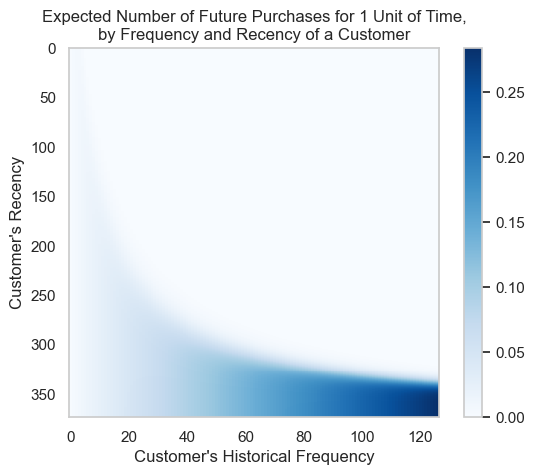

In [64]:
from lifetimes.plotting import plot_frequency_recency_matrix

plot_frequency_recency_matrix(betageo, cmap='Blues')
plt.grid(False)


We can see that if a customer has bought 125 times from us, and their latest purchase was when they were 350 days old (given the individual is 350 days old), then they are our best customer (bottom-right).

Our coldest customers are those that are in the top-right corner: they bought a lot quickly, and we haven’t seen them in months.

There’s also that beautiful 'tail' around (25,250). That represents the customer who buys infrequently, but we’ve seen them recently, so they might buy again - we’re not sure if they are dead or just between purchases.

### Probability of still being alive Matrix

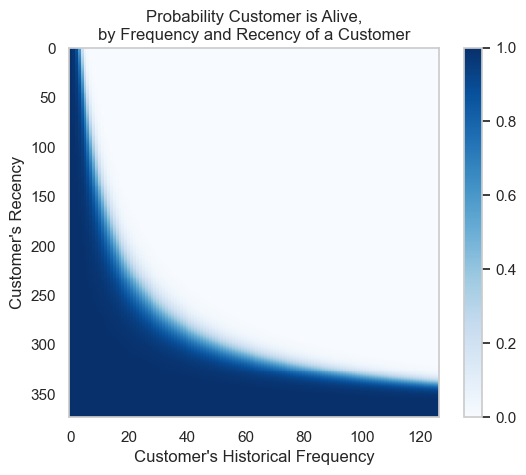

In [65]:
from lifetimes.plotting import plot_probability_alive_matrix

plot_probability_alive_matrix(betageo, cmap='Blues')
plt.grid(False)


### Interpreting the Chart:

- **Top-left corner**: Customers with high frequency and recent purchases have the highest probability of being alive.
- **Bottom-right corner**: Customers with low frequency and long recency have the lowest probability of being alive.
- **Gradient**: The gradient from dark to light blue shows how the probability decreases as frequency decreases or recency increases.


In [66]:
#Predict future transaction in next 14 (2 weeks) days

t = 14
clv_data['predicted_purchases'] = betageo.conditional_expected_number_of_purchases_up_to_time(t, 
                                                                                              clv_data['frequency'], 
                                                                                              clv_data['recency'], 
                                                                                              clv_data['T'])


clv_data.sort_values(by='predicted_purchases', ascending=False).head(11)

,frequency,recency,T,monetary_value,predicted_purchases
CustomerID,,,,,
14911.0,126.0,364.0,373.0,1081.672698,3.972063
12748.0,107.0,363.0,373.0,305.088879,3.376955
17841.0,107.0,363.0,373.0,354.185794,3.376955
14606.0,86.0,364.0,373.0,134.914186,2.719950
15311.0,86.0,363.0,373.0,687.695930,2.719693
12971.0,68.0,362.0,372.0,161.513088,2.160885
13089.0,62.0,358.0,369.0,861.448548,1.985773
14527.0,51.0,357.0,369.0,148.704314,1.638062
13798.0,49.0,361.0,372.0,712.420612,1.564348


In [67]:
# Lets take random customere id for prediction

t = 30
customer = clv_data.loc[16422]
betageo.predict(t, customer['frequency'], customer['recency'], customer['T'])

3.237757705233109

Result: Our model predicts that customrer with 16422 ID's, future transaction is approx 3-4 in 30 days

#### Before, We use Gamma_Gamma Model for estimating Customer Lifetime Value. There is few assumption of Gamma-Gamma model is:-


In [70]:
#Check if there is correlation between monetary value and frequency in order to use gamma gamma model for CLV calculation.
clv_data[['monetary_value', 'frequency']].corr()

,monetary_value,frequency
monetary_value,1.000000,0.299253
frequency,0.299253,1.000000



The model we are going to use to estimate the CLV for our userbase is called the Gamma-Gamma submodel, which relies upon an important assumption. The Gamma-Gamma submodel, in fact, assumes that there is no relationship between the monetary value and the purchase frequency. In practice we need to check whether the Pearson correlation between the two vectors is close to 0 in order to use this model.

In [112]:
# Our returning customers summary
returning_customers = clv_data[clv_data['frequency']>0]

print(returning_customers.head(5))

            frequency  recency      T  monetary_value  predicted_purchases
CustomerID                                                                
12347.0           5.0    328.0  367.0      674.678000             0.184802
12348.0           3.0    283.0  358.0      301.480000             0.123797
12352.0           6.0    260.0  296.0      368.256667             0.258101
12356.0           2.0    303.0  325.0      269.905000             0.099047
12359.0           3.0    274.0  331.0     1941.693333             0.132087


In [113]:
from lifetimes import GammaGammaFitter

In [114]:
ggf = GammaGammaFitter(penalizer_coef=0)
ggf.fit(returning_customers['frequency'], returning_customers['monetary_value'])

print(ggf)

<lifetimes.GammaGammaFitter: fitted with 2692 subjects, p: 2.11, q: 3.55, v: 500.67>


In [115]:
returning_customers['expected_average_value'] = ggf.conditional_expected_average_profit(returning_customers['frequency'], 
                                                             returning_customers['monetary_value'])
returning_customers.head()

,frequency,recency,T,monetary_value,predicted_purchases,expected_average_value
CustomerID,,,,,,
12347.0,5.0,328.0,367.0,674.678000,0.184802,624.350632
12348.0,3.0,283.0,358.0,301.480000,0.123797,334.156986
12352.0,6.0,260.0,296.0,368.256667,0.258101,376.159941
12356.0,2.0,303.0,325.0,269.905000,0.099047,324.648867
12359.0,3.0,274.0,331.0,1941.693333,0.132087,1504.359767


## Customer Lifetime Values

In [116]:
betageo.fit(clv_data['frequency'], clv_data['recency'], clv_data['T'])

CLV = ggf.customer_lifetime_value(
    betageo, 
    clv_data['frequency'], 
    clv_data['recency'], 
    clv_data['T'], 
    clv_data['monetary_value'], time=3, # 3 months
    discount_rate=0.001)
    # monthly discount rate ~ 0.75% in 2011 (source: statista)

CLV.head(10)

CustomerID
12347.0    740.008881
12348.0    265.326228
12349.0    335.081625
12350.0     80.103681
12352.0    622.628014
12353.0    110.675408
12354.0    100.539614
12355.0    106.829029
12356.0    206.243513
12357.0    287.988683
Name: clv, dtype: float64

In [117]:
clv = pd.DataFrame(CLV)
clv.rename(columns={'clv':'Cust_LTV'}, inplace=True)
clv.head()


,Cust_LTV
CustomerID,
12347.0,740.008881
12348.0,265.326228
12349.0,335.081625
12350.0,80.103681
12352.0,622.628014


In [118]:
# show RFM data: clv_data
RFM_data = clv_data.reset_index()
RFM_data.head()

,CustomerID,frequency,recency,T,monetary_value,predicted_purchases
0,12347.0,5.0,328.0,367.0,674.678000,0.184802
1,12348.0,3.0,283.0,358.0,301.480000,0.123797
2,12349.0,0.0,0.0,18.0,0.000000,0.125784
3,12350.0,0.0,0.0,310.0,0.000000,0.030054
4,12352.0,6.0,260.0,296.0,368.256667,0.258101


In [119]:
# join 2 dataframe on Customers ID
rfm = pd.merge(RFM_data, clv, on='CustomerID')
rfm.sort_values(by='frequency', ascending=False).head()

,CustomerID,frequency,recency,T,monetary_value,predicted_purchases,Cust_LTV
1858,14911.0,126.0,364.0,373.0,1081.672698,3.972063,27390.158135
3969,17841.0,107.0,363.0,373.0,354.185794,3.376955,7684.539128
318,12748.0,107.0,363.0,373.0,305.088879,3.376955,6633.204508
2152,15311.0,86.0,363.0,373.0,687.695930,2.719693,11927.829433
1641,14606.0,86.0,364.0,373.0,134.914186,2.719950,2420.750126


# RFM Segmentation

### Standardization

In [120]:
from sklearn.preprocessing import StandardScaler

sc_data = StandardScaler()
data_std = sc_data.fit_transform(rfm)

In [121]:
data_std = pd.DataFrame(data_std, columns= rfm.columns)
data_std.head()

,CustomerID,frequency,recency,T,monetary_value,predicted_purchases,Cust_LTV
0,-1.718167,0.395069,1.570262,1.221983,0.930542,0.155976,0.159762
1,-1.717585,0.046003,1.221610,1.144688,0.094843,-0.173111,-0.133931
2,-1.717004,-0.477597,-0.971020,-1.775360,-0.580258,-0.162391,-0.090773
3,-1.716423,-0.477597,-0.971020,0.732446,-0.580258,-0.678802,-0.248531
4,-1.715260,0.569602,1.043410,0.612208,0.244376,0.551381,0.087136


## Elbow Method

In [122]:
# Plot Elbow Method to find optimal clusters
from sklearn.cluster import KMeans



wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_std)
    wcss.append(kmeans.inertia_)

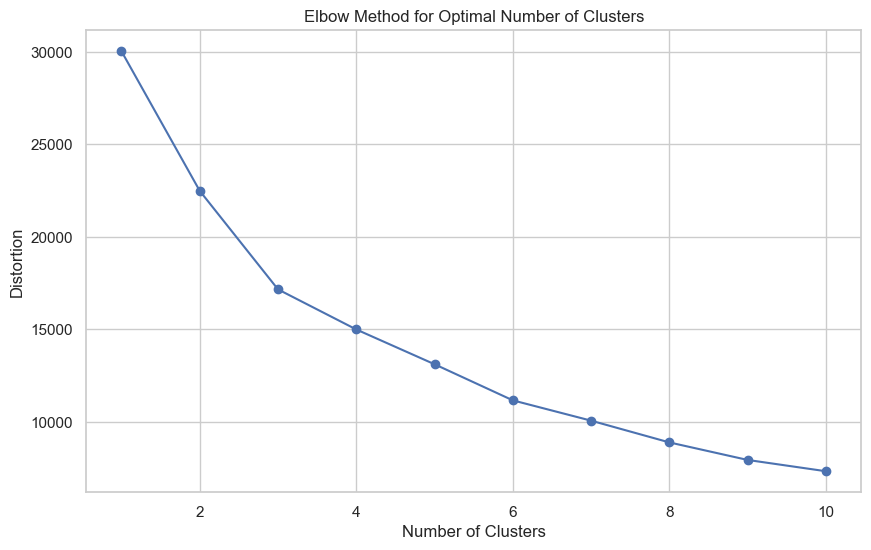

In [123]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

In [124]:
from kneed import KneeLocator
kl = KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

3

In [125]:
# Apply K-means clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=0)

In [126]:
# fit model 
kc = kmeans.fit(data_std.values)
cluster_labels = kc.labels_

# add cluster
data_cluster = data_std.assign(K_Cluster = cluster_labels)
data_cluster.head()


,CustomerID,frequency,recency,T,monetary_value,predicted_purchases,Cust_LTV,K_Cluster
0,-1.718167,0.395069,1.570262,1.221983,0.930542,0.155976,0.159762,2
1,-1.717585,0.046003,1.221610,1.144688,0.094843,-0.173111,-0.133931,2
2,-1.717004,-0.477597,-0.971020,-1.775360,-0.580258,-0.162391,-0.090773,0
3,-1.716423,-0.477597,-0.971020,0.732446,-0.580258,-0.678802,-0.248531,0
4,-1.715260,0.569602,1.043410,0.612208,0.244376,0.551381,0.087136,2


In [128]:
data_cluster['K_Cluster'].value_counts()

0    2506
2    1766
1      19
Name: K_Cluster, dtype: int64

In [129]:
# add label to 'data' dataframe
data_label = rfm.assign(K_Cluster = cluster_labels)
data_label.head()

,CustomerID,frequency,recency,T,monetary_value,predicted_purchases,Cust_LTV,K_Cluster
0,12347.0,5.0,328.0,367.0,674.678000,0.184802,740.008881,2
1,12348.0,3.0,283.0,358.0,301.480000,0.123797,265.326228,2
2,12349.0,0.0,0.0,18.0,0.000000,0.125784,335.081625,0
3,12350.0,0.0,0.0,310.0,0.000000,0.030054,80.103681,0
4,12352.0,6.0,260.0,296.0,368.256667,0.258101,622.628014,2


In [131]:
RFM = data_label[['frequency', 'recency', 'T', 'monetary_value', 'Cust_LTV']]
RFM.head()

,frequency,recency,T,monetary_value,Cust_LTV
0,5.0,328.0,367.0,674.678000,740.008881
1,3.0,283.0,358.0,301.480000,265.326228
2,0.0,0.0,18.0,0.000000,335.081625
3,0.0,0.0,310.0,0.000000,80.103681
4,6.0,260.0,296.0,368.256667,622.628014


In [132]:
rfm_normalized_melt = pd.melt(data_cluster, id_vars=['K_Cluster'], 
                              value_vars=['recency', 'frequency', 'monetary_value', 'T', 'Cust_LTV'],
                              var_name='Metric', value_name='Value')

In [133]:
rfm_normalized_melt.head()

,K_Cluster,Metric,Value
0,2,recency,1.570262
1,2,recency,1.221610
2,0,recency,-0.971020
3,0,recency,-0.971020
4,2,recency,1.043410


<Axes: xlabel='Metric', ylabel='Value'>

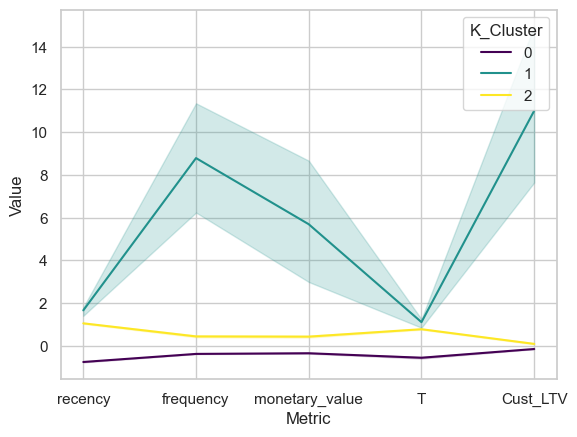

In [136]:
sns.lineplot(x='Metric', y='Value', hue='K_Cluster', data=rfm_normalized_melt, palette='viridis')

### K_Cluster Descriptions

- **K_Cluster 0: Low Spender**
  - Spend less but most recently.

- **K_Cluster 1: Average Customers**
  - So-so.

- **K_Cluster 2: Best Customers**
  - Bought most frequently, high spender, highest CLV.


## Summary & Reccomendation

### K_Cluster Descriptions

- **Cluster 0: Low Spender Group**
  - This cluster consists of low spenders who have made purchases most recently. It primarily includes new customers or first-time buyers.

- **Cluster 1: Mid-Spender Customers**
  - Cluster 1 represents mid-spender customers. They are existing customers who purchase less frequently.

- **Cluster 2: Best Customers**
  - Cluster 2 is the best customer group. These customers are the most frequent and highest spenders. They are existing buyers and are predicted to spend even more in the next 2 months.


## Recommendation

### Cluster Strategies

- **Cluster 0: First-Time Buyers**
  - In Cluster 0, the majority are first-time buyers. To keep them engaged, we can offer discounts or cashback. This approach encourages them to return within a certain period to purchase our products again. Although this requires a certain amount of investment, retaining this cluster is more beneficial than converting new customers.

- **Cluster 1: Mid-Spender Customers**
  - Similar to Cluster 0, we will offer discounts to encourage customers in Cluster 1 to return to our company. Our focus is on increasing the buying frequency in both Cluster 0 and Cluster 1. However, since customers in Cluster 1 are not first-time buyers, the budget required to offer them discount promotions is slightly lower than that needed for Cluster 0.

- **Cluster 2: Best Customers**
  - Since Cluster 2 consists of the best customers, our focus should be on building their loyalty. One of the most effective methods is through a loyalty program. We can further increase their spending on our products by creating and promoting a loyalty program tailored to their needs.
